### Importando bibliotecas

In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

# Regressão Linear

Um algoritmo de aprendizagem de máquinas (AM) preditivo é uma função que, dado um conjunto de exemplos rotulados, constrói um estimador. O rótulo toma valores em um domínio conhecido. 

**Se esse domínio for um conjunto infinito e ordenado de valores, trata-se de um problema de regressão, que induz um regressor.** 

Em tarefas de regressão, o programa de computador é solicitado a prever um valor numérico (valor real) dado alguma entrada. Para resolver essa tarefa, o algoritmo de aprendizagem precisa gerar uma função $$f:R^n→R$$ 

Exemplos:

- entender o relacionamento entre os preços futuros de títulos financeiros no mercado de capitais e variáveis macroeconômicas; 
- prever a demanda de determinado produto ao longo do tempo com base em demandas passadas e no preço do produto; 
- prever o retorno da colheita de determinado produto agrícola com base no preço internacional e no volume de chuvas;
- prever o consumo de energia elétrica com base no tamanho da fábrica.

## Regressão Linear Simples

Para entender a intuição de modelos de regressão, consideremos inicialmente o caso mais simples, quando há apenas uma variável independente (atributo) x e a equação que relaciona as variáveis linear. 

**Esse modelo é chamado de regressão linear simples.**

Vamos iniciar plotando um grafo de dispersão para uma função linear qualquer.

In [3]:
X = 2 * np.random.rand(100, 1)

In [5]:
X[:10]

array([[0.60724755],
       [0.76929911],
       [0.97290223],
       [1.99782301],
       [0.12311867],
       [1.02985193],
       [1.15969345],
       [0.84854124],
       [1.09137926],
       [1.63644356]])

In [6]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [7]:
y [0:5]

array([[ 6.42786604],
       [ 7.14030376],
       [ 7.0112196 ],
       [11.08487966],
       [ 2.38791799]])

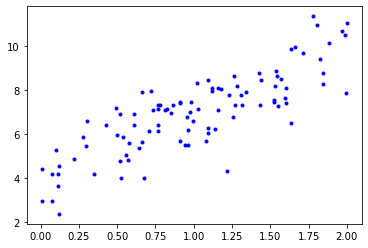

In [8]:
plt.plot(X, y, "b.")


É impossível obter uma reta que passe por todos os pontos!

A ideia é que existe uma indicação de que os pontos estariam dispostos aleatoriamente em volta de uma reta. Assim, seria razoável assumir que a média da variável aleatória $y$ está relacionada à variável explanatória $x$ por um relacionamento linear:


$$E(y│x)=μ_{y|x}=w_0+w_1 x$$

- $w_0$ é o intercepto da equação
- $w_1$ é o coeficiente angular. 

**Interpretação**: Embora a média de y seja uma função linear de $x$, um valor observado qualquer $y_i$ não cai necessariamente na reta. 

$$y=w_0+w_1x + \epsilon$$

Precisamos estimas $w_0$ e $w_1$. Fazemos isso minimizando a função custo associada ao erro médio quadrático.

$$min_{w_0,w_1}⁡ \ J= \sum_{i=1}^n [y_i - (w_0 + w_1 x_i)]^2$$

Essa é uma equação convexa em relação aos parâmetros!

Podemos minimizá-la, pelas condições de primeira ordem de otimização, pela escolha das estimativas de parâmetros que satisfaçam:

$$\frac{\partial J}{\partial w_0} = 0$$

$$\frac{\partial J}{\partial w_1} = 0$$


As relações resultam em uma solução fechada dada por:

$${\hat{w}}_0=\bar{y}-{\hat{w}}_1\bar{x}$$

$${\hat{w}}_1=\frac{{SQ}_{xy}}{{SQ}_{xx}}=\frac{\sum_{i}{{(y}_i-\bar{y}){(x}_i-\bar{x})}}{\sum_{i}{{(x}_i-\bar{x})}^2}=\frac{\sum_{i=1}^{n}{y_ix_i}-\frac{\left(\sum_{i=1}^{n}y_i\right)\left(\sum_{i=1}^{n}x_i\right)}{n}}{\sum_{i=1}^{n}x_i^2-\frac{({\sum_{i=1}^{n}{x_i)}}^2}{n}}$$

Assim, obtém-se o modelo regressor $\hat{y}={\hat{w}}_0+{\hat{w}}_1x$ que estima o valor médio do modelo de regressão. Cada observação satisfaz a relação $y_i={\hat{w}}_0+{\hat{w}}_1x+\epsilon$, onde $\epsilon=y_i-{\hat{y}}_i$ é chamado de desvio ou resíduo.

## Regressão linear com vários atributos

No caso genérico, uma observação, então, é dada por um vetor de $d$ atributos $\mathbf{x}_i \in \mathbb{R}^d$. 

Considerando o relacionamento entre as variáveis de entrada $\mathbf{x}_i \in \mathbb{R}^d$ e o valor de saída $y\in\mathbb{R}$ linear, temos uma **regressão linear**:

$$y=\mathbf{w}^{T}\mathbf{x} + \epsilon$$


Onde $\mathbf{w}^{T}=[w_1,\ldots,\ w_k]$ é um vetor de parâmetros, no qual $w_j$ é o coeficiente que multiplica o atributo $x_j$ antes de somar as contribuições de todos os atributos. 

O coeficiente $w_j$ indica como a variável dependente $y$ muda em média quando $x_j$ é adicionado em uma unidade e as demais variáveis independentes permanecem constantes. 

Esses parâmetros são valores que controlam o comportamento do sistema, muitas vezes chamados de pesos ou coeficientes da regressão.

### Adicionando o intercepto

Frequentemente, o termo regressão linear é usado para um modelo um pouco mais sofisticado, com um parâmetro adicional: o intercepto $b$. 


Teríamos: $y=\mathbf{w}^T\mathbf{x}+b$. 

No entanto, podemos continuar usando o modelo anterior (apenas com pesos). Para isso, inserimos um valor extra para cada observação $\mathbf{x}_i$, sempre igual a $x_{0i}=1$. 

Dessa forma, o peso correspondente à entrada extra ($w_0$) desempenha o papel do intercepto.


### Interpretação

O modelo com $d$ atributos descreve um hiperplano no espaço d-dimensional das variáveis dos coeficientes.

## Treinamento

Seja $\mathbf{x}_i=[1,\ x_1,\ \ldots,\ x_k]$ uma observação, ou exemplo, e $x_{i,j}$ o valor do atributo $j$ na observação $i$. 

A primeira posição de cada observação contém o valor $1$, de modo que sigamos o modelo com intercepto $w_0$. Seja $\mathbf{X} \in \mathbb{R}^{n \times d}$ uma matriz formada por $n$ observações dispostas suas linhas. 

Essa matriz tem $d+1$ colunas, onde $d$ é o número total de parâmetros ($d$ coeficientes + 1 intercepto). 

A notação fica:


$$ \mathbf{y}= \left[\begin{matrix} y_1\\y_2\\\vdots\\y_n\\\end{matrix}\right]_{n\times 1}$$

$$\mathbf{X}=\left[\begin{matrix}1&x_{1,1}&\ldots&x_{1,d}\\1&x_{2,1}&\ldots&x_{2,d}\\\vdots&\vdots&\vdots&\vdots\\1&x_{n,1}&\ldots&x_{n,d}\\\end{matrix}\right]_{n \times (d+1)}$$ 

$$\mathbf{w}=\left[\begin{matrix}w_0\\w_1\\\vdots\\w_d\\\end{matrix}\right]_{d\times1}$$

$$\mathbf{\epsilon}=\left[\begin{matrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\\\end{matrix}\right]_{n \times 1}$$


O modelo de regressão linear aprenderá, a partir do conjunto de treinamento, a escolher os estimadores mais adequados para os parâmetros do modelo de regressão.

**Para isso, busca-se minimizar a soma dos quadrados dos desvios nos exemplos de treinamento.**

A diferença entre o valor observado e um valor ajustado pela regressão é o resíduo (desvio), dada por $𝜖_𝑖=𝑦_𝑖−𝑦_𝑖$. 

Na notação matricial, a soma dos quadrados dos desvios é dada por:


$$SQ_E=\sum_{i}\left(\mathbf{y}-\hat{\mathbf{y}}\right)_i^2$$

**Isso corresponde a norma Euclideana dos desvios ao quadrado:**

$$\sum_{i}\left(\mathbf{y_i}-\hat{\mathbf{y_i}}\right)^2 = \left|\left|\mathbf{y}-\hat{\mathbf{y}}\right|\right|_2^2$$

Para minimizar essa função, usamos o mesmo conceito praticado para regressão linear simples. O vetor gradiente deve ser igual a zero.


$$\nabla_\mathbf{w}\left|\left|\mathbf{y}-\hat{\mathbf{y}}\right|\right|_2^2 = 0\rightarrow\nabla_\mathbf{w}\left|\left|\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right|\right|_2^2=0$$


$$
\nabla_\mathbf{w}\left(\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right)=0
$$

$$
\nabla_\mathbf{w}\left(\mathbf{y}^\mathbf{T}\mathbf{y}-2{\hat{\mathbf{w}}}^T\mathbf{X}^\mathbf{T}\mathbf{y}+{\hat{\mathbf{w}}}^T\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}\right)=0
$$

$$
-2\mathbf{X}^\mathbf{T}\mathbf{y}+2\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=0
$$


$$
2\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=2\mathbf{X}^\mathbf{T}\mathbf{y}
$$


$$
\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=\mathbf{X}^\mathbf{T}\mathbf{y}
$$

$$
\hat{\mathbf{w}}=\left(\mathbf{X}^\mathbf{T}\mathbf{X}\right)^{-1}\mathbf{X}^\mathbf{T}\mathbf{y}
$$


**Esse resultado é conhecido como Equação Normal**

$$\lambda \times x + y $$

In [9]:
X[0:5]

array([[0.60724755],
       [0.76929911],
       [0.97290223],
       [1.99782301],
       [0.12311867]])

In [11]:
# Vamos adicionar o termo x0 = 1 para cada exemplo do nosso conjunto.
# Lembrando que, dessa forma, b torna-se w_0.

X_b = np.c_[np.ones((100, 1)), X]

X_b[0:5]

array([[1.        , 0.60724755],
       [1.        , 0.76929911],
       [1.        , 0.97290223],
       [1.        , 1.99782301],
       [1.        , 0.12311867]])

Nossa hipótese de $\mathbf{w}$ que minimiza o erro quadrático médio pode ser obtido por meio da equação normal.

$$
\hat{\mathbf{w}}=\left(\mathbf{X}^\mathbf{T}\mathbf{X}\right)^{-1}\mathbf{X}^\mathbf{T}\mathbf{y}
$$


In [13]:
X_b[:10]

array([[1.        , 0.60724755],
       [1.        , 0.76929911],
       [1.        , 0.97290223],
       [1.        , 1.99782301],
       [1.        , 0.12311867],
       [1.        , 1.02985193],
       [1.        , 1.15969345],
       [1.        , 0.84854124],
       [1.        , 1.09137926],
       [1.        , 1.63644356]])

In [14]:
y[:10]

array([[ 6.42786604],
       [ 7.14030376],
       [ 7.0112196 ],
       [11.08487966],
       [ 2.38791799],
       [ 7.14011518],
       [ 8.0894369 ],
       [ 6.96378409],
       [ 6.29588065],
       [ 9.89856932]])

In [15]:
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w

array([[4.13913478],
       [2.83203843]])

## Previsão  

Agora que estimamos nosso vetor de parâmetros, $\mathbf{\hat{w}}$, minimizando o erro seja médio, podemos realizar as previsões.

Nossa função de previsão é:

$$f(x_i)=\hat{y_i}=\mathbf{\hat{w}}^T\mathbf{x_i}$$

In [17]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [18]:
X_new_b = np.c_[np.ones((2, 1)), X_new]  # adiciona x0 = 1 aos novos exemplos
X_new_b


array([[1., 0.],
       [1., 2.]])

In [19]:
# Para a previsão, utilizaremos o w calculado acima
y_predict = X_new_b.dot(w)
y_predict

array([[4.13913478],
       [9.80321163]])

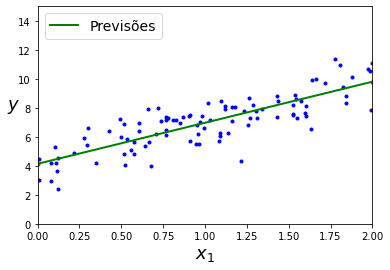

In [20]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r.")
plt.plot (X_new, y_predict, "-g", linewidth=2, label="Previsões")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## sklearn

Vamos agora utilizar o pacote sklearn. Veja que o mesmo resultado é obtido.

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13913478]), array([[2.83203843]]))

In [24]:
LinearRegression().fit(X,y).predict(X_new)

array([[4.13913478],
       [9.80321163]])

In [25]:
lin_reg.predict(X_new)

array([[4.13913478],
       [9.80321163]])

# Regressão Polinomial

Modelos de estrutura mais complexa que a estrutura de genérica do modelo linear podem, ainda, ser tratados por meio de regressão linear. 

Por exemplo, um modelo polinomial nas variáveis da regressão pode ser transformado em um modelo linear:

$$y=w_0+w_1x_1+w_2x_1^2+w_3x_1^3+\epsilon\rightarrow y=w_0+w_1x_1+w_2x_2+w_3x_3+\epsilon$$

Além disso, efeitos de interação entre variáveis podem ser tratados de maneira linear, por exemplo, pode-se considerar o produto entre duas variáveis como uma nova variável. Dessa forma:


$$y=w_0+w_1x_1+w_2x_1^2+w_3x_1x_2+\epsilon\rightarrow y=w_0+w_1x_1+w_2x_2+w_3x_3+\epsilon$$




## Interpretação

**Importante**: Embora estes modelos ainda sejam considerados de regressão linear, a forma da superfície gerada por eles não é linear.


**Podemos encontrar modelos mais complexos com a mesma formulação aprendida na aula até aqui!**

Em geral, qualquer modelo de regressão que seja linear em parâmetros ($\mathbf{w}$) é um modelo de regressão linear, independentemente da forma da superfície que ele gera. 


# Exemplo

In [43]:
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

In [44]:
print(X[:5])

[[ 2.1278965 ]
 [ 0.33955771]
 [-2.79817013]
 [-0.29257262]
 [-2.97226969]]


In [45]:
print(y[0:5])

[[6.96429375]
 [1.37059472]
 [2.2378386 ]
 [3.14579716]
 [4.66961823]]


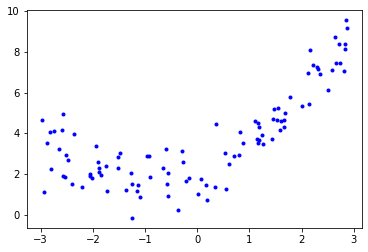

In [46]:
plt.plot(X, y, "b.")


## Transformando os atributos com sklearn

Temos apenas 1 atributo em X. Porém, podemos perceber graficamente que nossa relação é não linear (uma parábola).

Vamos adicionar um novo atributo a nossa matriz de modo que este receba o quadrado do nosso atributo original. 

In [47]:
X[0:10]

array([[ 2.1278965 ],
       [ 0.33955771],
       [-2.79817013],
       [-0.29257262],
       [-2.97226969],
       [ 0.5361318 ],
       [ 2.58691547],
       [-2.05126779],
       [-1.1276572 ],
       [ 0.81267124]])

In [48]:
from sklearn.preprocessing import PolynomialFeatures

transf_2 = PolynomialFeatures(degree=2, include_bias=False)
X_2 = transf_2.fit_transform(X)


In [49]:
X_2[0:10]

array([[ 2.1278965 ,  4.5279435 ],
       [ 0.33955771,  0.11529944],
       [-2.79817013,  7.82975609],
       [-0.29257262,  0.08559874],
       [-2.97226969,  8.83438713],
       [ 0.5361318 ,  0.28743731],
       [ 2.58691547,  6.69213167],
       [-2.05126779,  4.20769955],
       [-1.1276572 ,  1.27161075],
       [ 0.81267124,  0.66043455]])

In [50]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_2, y)
lin_reg_2.intercept_, lin_reg.coef_

(array([2.10891233]), array([[2.92594802]]))

**Digamos que recebemos 100 novos exemplos.**

In [51]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

In [52]:
X_new_2 = transf_2.transform(X_new)
y_new_2 = lin_reg_2.predict(X_new_2)

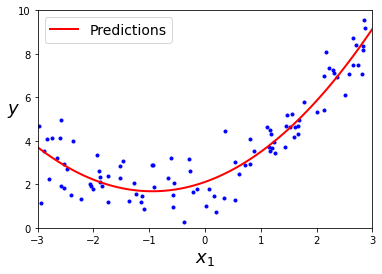

In [55]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new_2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Analisando situações de overfitting e underfitting pelo hiperparâmetro "degree"

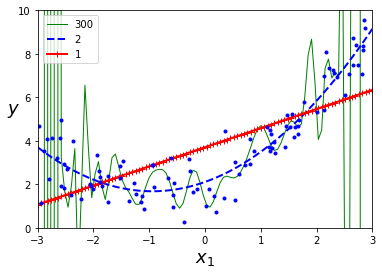

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

## Um problema prático de Regressão 